<a href="https://colab.research.google.com/github/seenu384/CODSOFT/blob/main/CodSoft1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

**LOADING DATASET**

In [ ]:
df=pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**DATA PREPROCESSING**

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [ ]:
#changing categorical data into numerical data
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Ticket']=label.fit_transform(df['Ticket'])
df['Embarked']=label.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.000000,1,0,523,7.2500,2
1,1,1,0,38.000000,1,0,596,71.2833,0
2,1,3,0,26.000000,0,0,669,7.9250,2
3,1,1,0,35.000000,1,0,49,53.1000,2
4,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,101,13.0000,2
887,1,1,0,19.000000,0,0,14,30.0000,2
888,0,3,0,29.699118,1,2,675,23.4500,2
889,1,1,1,26.000000,0,0,8,30.0000,0


In [ ]:
correlation=df.corr().round(2)
correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.00,-0.34,-0.54,-0.07,-0.04,0.08,-0.16,0.26,-0.17
Pclass,-0.34,1.00,0.13,-0.33,0.08,0.02,0.32,-0.55,0.16
Sex,-0.54,0.13,1.00,0.08,-0.11,-0.25,0.06,-0.18,0.11
Age,-0.07,-0.33,0.08,1.00,-0.23,-0.18,-0.07,0.09,-0.03
SibSp,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.08,0.16,0.07
Parch,0.08,0.02,-0.25,-0.18,0.41,1.00,0.02,0.22,0.04
Ticket,-0.16,0.32,0.06,-0.07,0.08,0.02,1.00,-0.01,-0.00
Fare,0.26,-0.55,-0.18,0.09,0.16,0.22,-0.01,1.00,-0.22
Embarked,-0.17,0.16,0.11,-0.03,0.07,0.04,-0.00,-0.22,1.00


**DATA VISUALIZATION**

<Axes: >

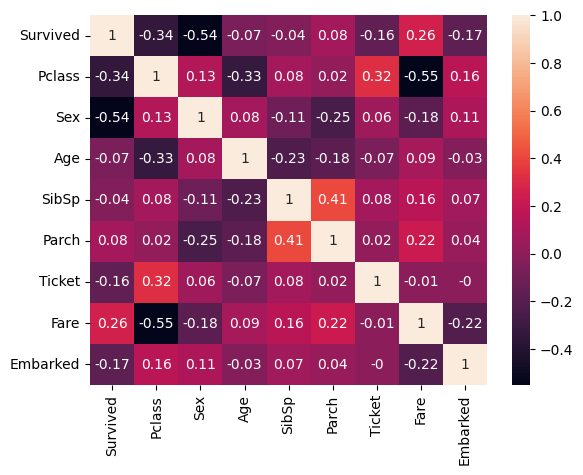

In [ ]:
sns.heatmap(correlation,annot=True)

**DETERMINING OUTLIERS**

<Axes: >

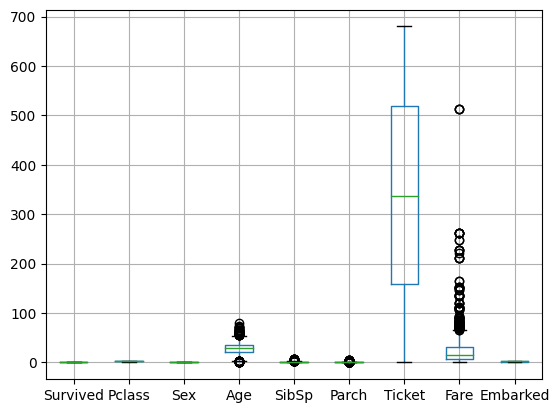

In [ ]:
df.boxplot()

**REMOVING OUTLIERS**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)
df1= df[~outliers]
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df1.shape)

Original dataset shape: (891, 9)
Cleaned dataset shape: (577, 9)


**SPLITTING INTO X AND Y**

In [ ]:
x=df1.drop('Survived',axis=1).values
y=df1['Survived'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  3.        ,   1.        ,  29.69911765, ...,  80.        ,
         56.4958    ,   2.        ],
       [  2.        ,   1.        ,  30.        , ..., 225.        ,
         13.        ,   2.        ],
       [  3.        ,   1.        ,  20.5       , ..., 525.        ,
          7.25      ,   2.        ],
       ...,
       [  2.        ,   0.        ,  28.        , ..., 100.        ,
         26.        ,   2.        ],
       [  3.        ,   0.        ,  29.69911765, ..., 281.        ,
          8.1375    ,   1.        ],
       [  3.        ,   1.        ,  29.69911765, ..., 573.        ,
          7.3125    ,   2.        ]])

In [ ]:
y_train

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,

**NORMALIZATION**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**APPLYING CLASSIFIERS**

**1. K-NEIGHBORS CLASSIFIER**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

Score is 0.7528735632183908
Confusion Matrix is [[107  16]
 [ 27  24]]
Classification Report is               precision    recall  f1-score   support

           0       0.80      0.87      0.83       123
           1       0.60      0.47      0.53        51

    accuracy                           0.75       174
   macro avg       0.70      0.67      0.68       174
weighted avg       0.74      0.75      0.74       174



<Axes: >

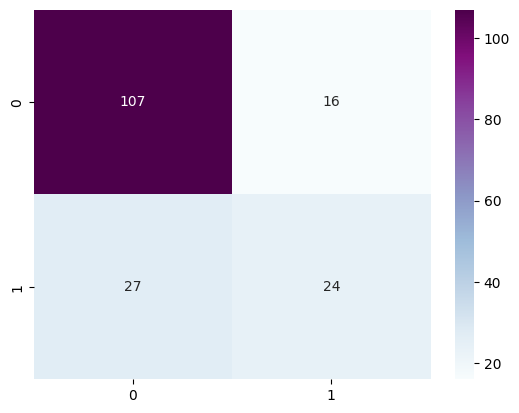

In [ ]:
print("Score is",accuracy_score(y_test,y_pred))
print("Confusion Matrix is",confusion_matrix(y_test,y_pred))
print("Classification Report is",classification_report(y_test,y_pred))
labels=['1','0']
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g',cmap='BuPu')

**2. DECISION TREE CLASSIFIER**

In [ ]:
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
y_pred1=tree.predict(x_test)
y_pred1

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

Score is 0.7701149425287356
Confusion Matrix is [[103  20]
 [ 20  31]]
Classification Report is               precision    recall  f1-score   support

           0       0.84      0.84      0.84       123
           1       0.61      0.61      0.61        51

    accuracy                           0.77       174
   macro avg       0.72      0.72      0.72       174
weighted avg       0.77      0.77      0.77       174



<Axes: >

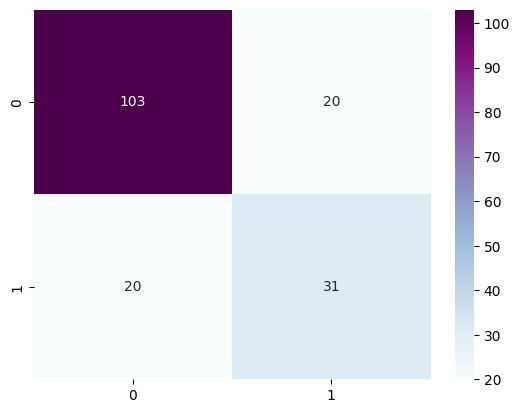

In [ ]:
print("Score is",accuracy_score(y_test,y_pred1))
print("Confusion Matrix is",confusion_matrix(y_test,y_pred1))
print("Classification Report is",classification_report(y_test,y_pred1))
labels=['1','0']
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g',cmap='BuPu')

**3. RANDOM FOREST CLASSIFIER**

In [ ]:
tree1=RandomForestClassifier(n_estimators=10,criterion='entropy')
tree1.fit(x_train,y_train)
y_pred2=tree1.predict(x_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

Score is 0.7471264367816092
Confusion Matrix is [[109  14]
 [ 30  21]]
Classification Report is               precision    recall  f1-score   support

           0       0.78      0.89      0.83       123
           1       0.60      0.41      0.49        51

    accuracy                           0.75       174
   macro avg       0.69      0.65      0.66       174
weighted avg       0.73      0.75      0.73       174



<Axes: >

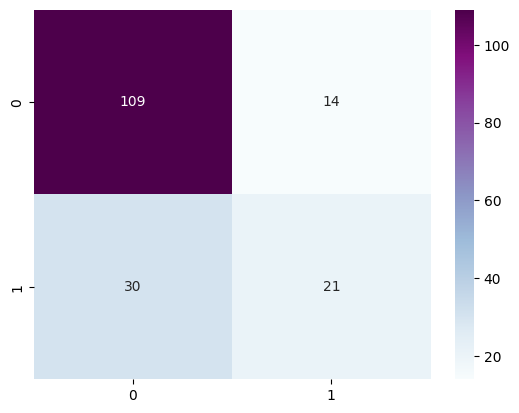

In [ ]:
print("Score is",accuracy_score(y_test,y_pred2))
print("Confusion Matrix is",confusion_matrix(y_test,y_pred2))
print("Classification Report is",classification_report(y_test,y_pred2))
labels=['1','0']
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g',cmap='BuPu')